In [3]:
import numpy as np
import python_speech_features as psf
from scipy.io import wavfile
#import matplotlib.pyplot as plot

NO_SPEAKERS = 4

spk  = [wavfile.read('/home/jugs/PycharmProjects/SpeakerRecognition1.0/audio_preprocessing/audio_sample_data/english' + str(i) + '.wav') for i in range(1, NO_SPEAKERS + 1)]

spk_mfcc = [psf.mfcc(spk[i][1], spk[i][0])  for i in range(0, NO_SPEAKERS)]

In [4]:
from functools import reduce
for i, speaker_mfcc in enumerate(spk_mfcc):
    average = reduce(lambda acc, ele: acc + ele, speaker_mfcc)
    average = list(map(lambda x: x/len(speaker_mfcc), average))
    print(speaker_mfcc)
    for j, feature_vector in enumerate(speaker_mfcc):
        for k, feature in enumerate(feature_vector):
            spk_mfcc[i][j][k] -= average[k]
# In[ ]:

[[ 15.89876109   5.22707736 -41.80189231 ...,  -9.55060426 -15.88432911
  -22.55177395]
 [ 16.44954945   1.93165548 -34.4173019  ...,  18.57174994   0.05868837
   -6.78190638]
 [ 16.7133753    4.28473037 -36.01104048 ...,  11.42836222 -11.36798226
    0.92120964]
 ..., 
 [ 14.15384889   6.76549726 -30.66197042 ...,   4.44253658  -3.80516899
   -4.09468388]
 [ 14.1207952    4.73538509 -30.57660534 ...,  -0.28573419 -11.45991462
   -9.63630667]
 [ 14.13810361   2.8057542  -27.85593791 ...,   5.85195711  -7.40856336
   -8.62944924]]
[[ 13.06880602 -12.57239826   5.6066917  ...,  -1.6714409    1.87479448
    3.47968358]
 [ 12.73891593 -14.72291356  -1.73521859 ..., -17.94136904 -10.83070479
   -8.00697503]
 [ 13.00180395 -14.3728039    5.54481615 ..., -10.55202414  -6.50679158
    2.13488029]
 ..., 
 [ 11.98319207 -14.82304536  11.23615033 ...,   0.35049044   5.76624209
    1.14063086]
 [ 12.34058055 -16.70889433  15.24291177 ...,  -4.66118903  -8.03563999
   -3.49658482]
 [ 15.07966013 -3

In [5]:
from sklearn.mixture import GaussianMixture

GMM = []
UBM = []
for i in range(NO_SPEAKERS):
    GMM.append(GaussianMixture(n_components= 256, covariance_type= 'diag'))
    UBM.append(GaussianMixture(n_components= 256, covariance_type= 'diag'))
    
total_mfcc = []
speaker_label = []
spk_train_size = []
spk_start = []
spk_end = []
for i in range(NO_SPEAKERS):
    spk_train_size.append(int(0.9 * len(spk_mfcc[i])))
    spk_start.append(len(total_mfcc))
    print(i)
    for mfcc in spk_mfcc[i][0:spk_train_size[i], :]:
        total_mfcc.append(mfcc)
        speaker_label.append(i)
    spk_end.append(len(total_mfcc))

0
1
2
3


In [6]:
for i in range(NO_SPEAKERS):
    GMM[i].fit(spk_mfcc[i])
    UBM[i].fit(total_mfcc[:spk_start[i]] + total_mfcc[spk_end[i]:])

In [7]:
for i in range(NO_SPEAKERS):
    print("For speaker {}".format(i+1))
    x = GMM[i].score_samples(spk_mfcc[i][spk_train_size[i] + 2 : ]) - UBM[i].score_samples(spk_mfcc[i][spk_train_size[i] + 2 : ])
    total = 0 
    correct = 0
    for i in x:
        if i > 0:
            correct +=1 
        total += 1
    print("accuracy is {}".format(correct/total))

For speaker 1
accuracy is 0.9861751152073732
For speaker 2
accuracy is 0.9569377990430622
For speaker 3
accuracy is 0.9591836734693877
For speaker 4
accuracy is 0.9441340782122905


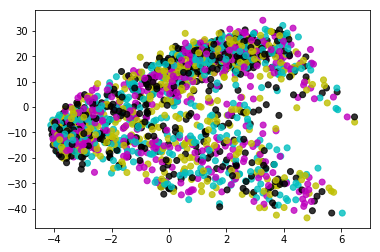

In [16]:
import matplotlib.pyplot as plot
#colors = ['r' if i==0 else 'g' for i in x.predict(spk_mfcc[1][spk_train_size[1] + 2 : ])]
ax = plot.gca()
ax.scatter(spk_mfcc[1][:,0], spk_mfcc[1][:,1], c='cmyk' ,alpha=0.8)
plot.show()